In [14]:
import numpy as np
from matplotlib import pyplot as plt
import wave
import scipy.linalg as sla

In [22]:
def read(filename, size=-1):
    fr = wave.open(filename, "rb")
    if size == -1:
        size = fr.getnframes()
    arr = np.array(list(fr.readframes(size)))
    arr = arr.reshape((arr.shape[0] // 4, 4))
    left = arr[:, 0] + ((arr[:, 1] - 128) % 256) * 256 - 32768
    right = arr[:, 2] + ((arr[:, 3] - 128) % 256) * 256 - 32768
    return left, right

In [16]:
def write(filename, left, right):
    fw = wave.open(filename, "wb")
    fw.setnchannels(2)
    fw.setsampwidth(2)
    fw.setnframes(left.size)
    fw.setframerate(44100)
    for side in (left, right):
        side += 2 ** 15
        side[side < 0] = 0
        side[side > 2 ** 16 - 1] = 2 ** 16 - 1
    arr = np.array((left % 256, ((left // 256 - 128) % 256),
                   right % 256, ((right // 256 - 128) % 256)
                  )).T.flatten()
    fw.writeframes(bytes(list(arr)))
    fw.close()

In [17]:
left, right = read('richard.wav')

In [5]:
norm = 0
def transform(input_file, output_file, func, sample_size=2000, file_size=-1):
    global norm
    left, right = read(input_file, file_size)
    for i in range(len(left) // sample_size):
        for side in (left, right):
            sample = side[i * sample_size : (i + 1) * sample_size]
            result = func(sample)
            norm += sla.norm(sample - result)
            side[i * sample_size : (i + 1) * sample_size] = result
    write(output_file, left, right)

In [20]:
def func(sample):
    u, s, vh = sla.svd(sample.reshape(n, n))
    s[10:] = 0
    result = (u @ np.diag(s) @ vh).reshape(n * n)
    result = result.round().astype(np.int)
    return result

In [23]:
n = 100
transform('richard.wav', 'richard-svd.wav', func, sample_size=n**2, file_size=-1)

In [ ]:
n = 100
transform('war_and_peace.wav', 'speech-svd.wav', func, sample_size=n**2, file_size=-1)

In [33]:
for n in range(50, 1000, 20):
    print(n)
    file_size = 44100 * 100
    norm = 0
    transform('richard.wav', 'richard-svd.wav', func, sample_size=n**2, file_size=file_size)
    print(norm / file_size / 2)

50
10.934758387405195
70
10.145338977822988
90
9.401783069334167
110
8.820252542622208
130
8.271197772732004
150
7.751707568342541
170
7.385034784167545
190


KeyboardInterrupt: 

In [45]:
left, right = read('svd.wav')

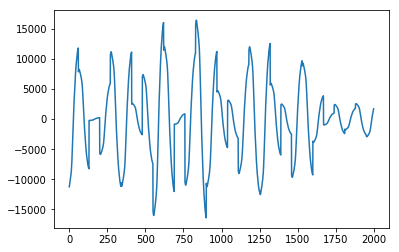

In [54]:
plt.plot(left[270000:272000])